# Red neuronal con los digitos MNIST

In [1]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# Cargamos los datos
nmax = 10000
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_width = img_height = x_train[0].shape[0]
x_t = x_train.reshape(x_train.shape[0], img_width*img_height)
X = x_t[0:nmax,]
X = X/255
y_train = y_train[0:nmax]

num_classes = 10

# Visualización de algunas imágenes

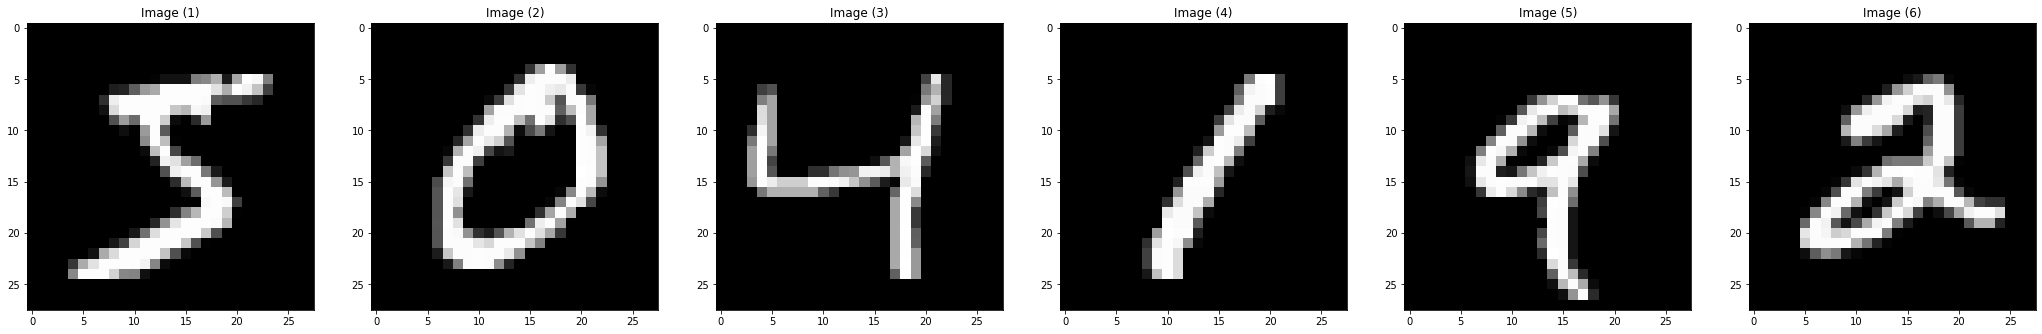

In [4]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

imgs = []
for i in range(6):
    imgs.append(x_train[i].reshape((28,28)))

show_images(imgs,1)

# Tensores de las imágenes

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

# Una red neuronal sencilla con una capa densamente conectada y una de salida

In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## Algunos detalles que luego se verán en el tutorial de la ayudantía...

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## categorizar las etiquetas y entrenar la red

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2556 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1045 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0493 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9886


## Resultados...

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0641 - accuracy: 0.9822


In [17]:
print('test_acc:', test_acc)

test_acc: 0.982200026512146
